# TEST BLANC TP

## Importation des dépendances 

In [20]:
# Commencer par pandas et Numpy
import pandas as pd
import numpy as np

# seaborn et matplotlib pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Modèles de classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression # pour les classes linéaires
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# Kmeans
from sklearn.cluster import KMeans

# Séparation des données
from sklearn.model_selection import train_test_split

# Métriques
from sklearn import metrics

## Importation des données

In [21]:
df = pd.read_csv('../Data/Cleaned_Students_Performance.csv')
#df.head(3)
#df.plot()
#df.shape
#df.describe()
#df.isnull()
df.info()
#df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.3+ KB


## Définition du problème :
 Prédiction de la moyenne des étudiants

## Cleaning

In [22]:
# Remplacement de "some high school" par "high school" 
df['parental_level_of_education'] = df['parental_level_of_education'].replace('some high school', 'high school')

# Transformation en numérique

# Niveau d'éducation parentale ordonné
from sklearn.preprocessing import OrdinalEncoder
education_order = ['high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
ordinal_encoder = OrdinalEncoder(categories=[education_order])
df['parental_num'] = ordinal_encoder.fit_transform(df[['parental_level_of_education']])

# Race
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['race_num'] = label_encoder.fit_transform(df['race_ethnicity'])
# Afficher les classes correspondantes
for i, race in enumerate(label_encoder.classes_):
     print(f"Nombre encodé {i} correspond à : {race}")
         
# Suppression des colonnes inutiles        
df = df.drop(columns=['race_ethnicity','lunch', 'parental_level_of_education', 'test_preparation_course','math_score','reading_score', 'writing_score', 'total_score'])
df.head()

Nombre encodé 0 correspond à : group A
Nombre encodé 1 correspond à : group B
Nombre encodé 2 correspond à : group C
Nombre encodé 3 correspond à : group D
Nombre encodé 4 correspond à : group E


,gender,average_score,parental_num,race_num
0,0,72.666667,3.0,1
1,0,82.333333,1.0,2
2,0,92.666667,4.0,1
3,1,49.333333,2.0,0
4,1,76.333333,1.0,2


## Some Data analytics and Visualization

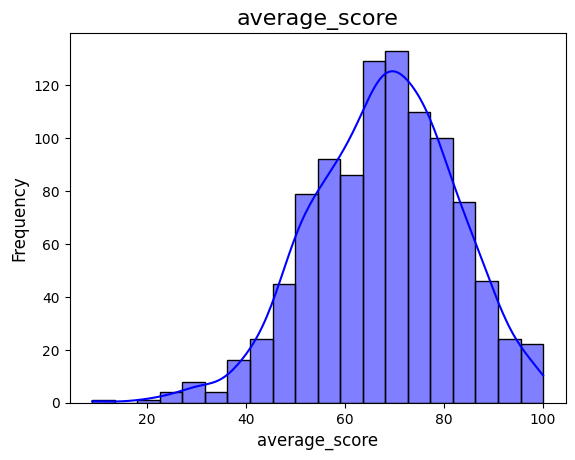

<Figure size 800x600 with 0 Axes>

In [23]:
# Distribution of Average Score
sns.histplot(df['average_score'], bins=20, kde=True, color='blue')
plt.title('average_score', fontsize=16)
plt.xlabel('average_score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.figure(figsize=(8,6))
plt.show()

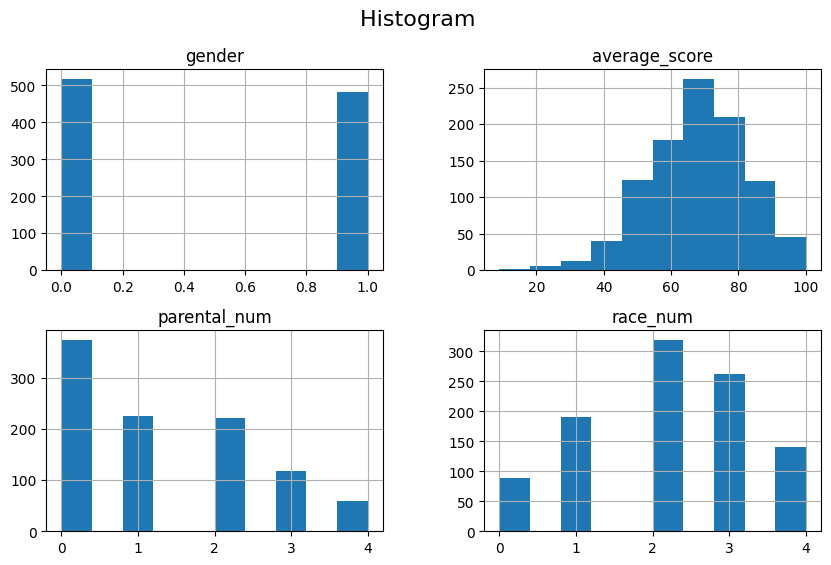

In [24]:
# Histogram :
fig = df.hist()
fig=plt.gcf()
fig.suptitle("Histogram ", fontsize=16)
fig.set_size_inches(10,6)
plt.show()

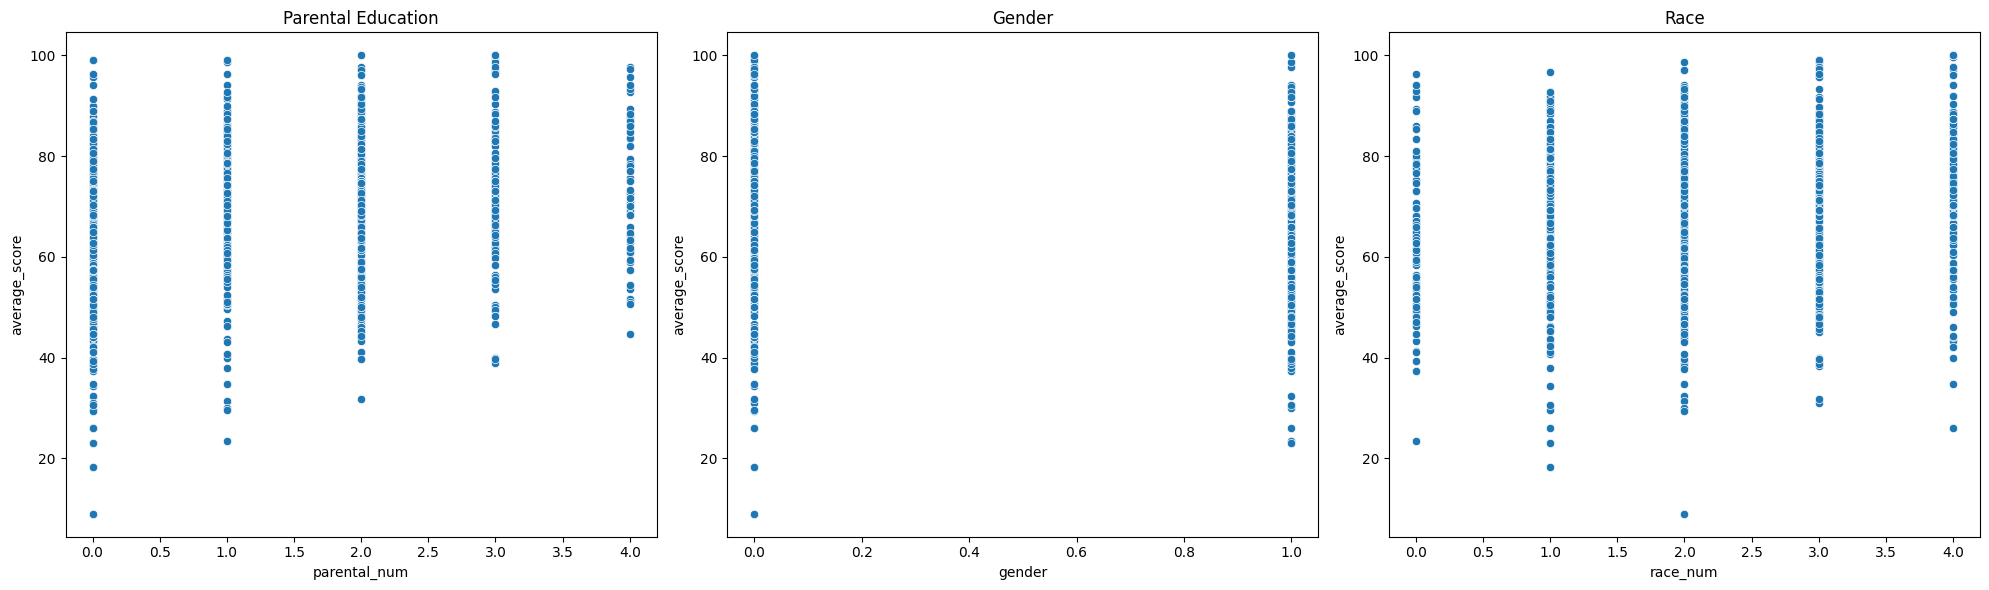

In [25]:
# Average Score vs Features : Scatter plot

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(x='parental_num', y='average_score', data=df, ax=ax1)
ax1.set_title('Parental Education')

sns.scatterplot(x='gender', y='average_score', data=df, ax=ax2)
ax2.set_title('Gender')

sns.scatterplot(x='race_num', y='average_score', data=df, ax=ax3)
ax3.set_title('Race')

plt.tight_layout()
plt.show()

C:\Users\zakaria boukeffa\AppData\Local\Temp\ipykernel_2776\1198117381.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='average_score', data=df, palette="Set2", ax=ax1)
C:\Users\zakaria boukeffa\AppData\Local\Temp\ipykernel_2776\1198117381.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental_num', y='average_score', data=df, palette="Set2", ax=ax2)
C:\Users\zakaria boukeffa\AppData\Local\Temp\ipykernel_2776\1198117381.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race_num', y='average_score', data=df, 

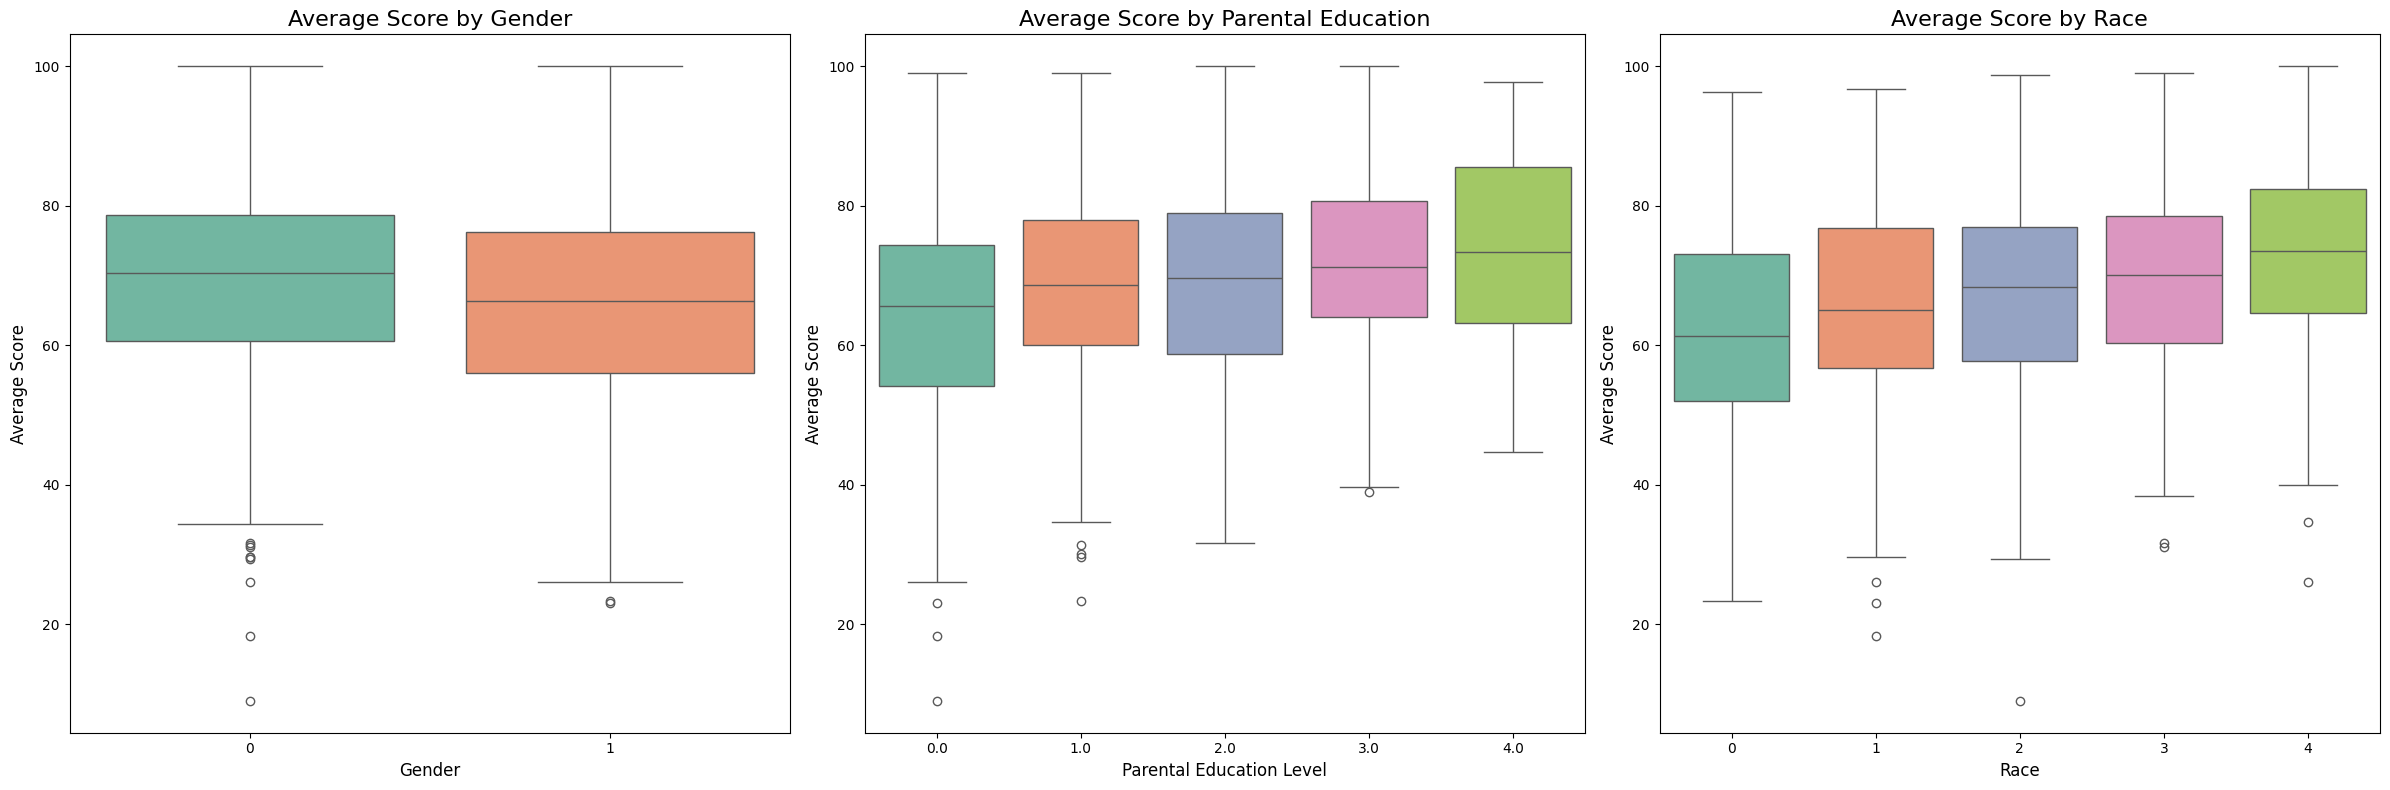

In [26]:
# Average Score vs Features : Box Plot

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# Boxplot for Gender
sns.boxplot(x='gender', y='average_score', data=df, palette="Set2", ax=ax1)
ax1.set_title('Average Score by Gender', fontsize=16)
ax1.set_xlabel('Gender', fontsize=12)
ax1.set_ylabel('Average Score', fontsize=12)

# Boxplot for Parental Education
sns.boxplot(x='parental_num', y='average_score', data=df, palette="Set2", ax=ax2)
ax2.set_title('Average Score by Parental Education', fontsize=16)
ax2.set_xlabel('Parental Education Level', fontsize=12)
ax2.set_ylabel('Average Score', fontsize=12)

# Boxplot for Race
sns.boxplot(x='race_num', y='average_score', data=df, palette="Set2", ax=ax3)
ax3.set_title('Average Score by Race', fontsize=16)
ax3.set_xlabel('Race', fontsize=12)
ax3.set_ylabel('Average Score', fontsize=12)

plt.tight_layout()
plt.show()

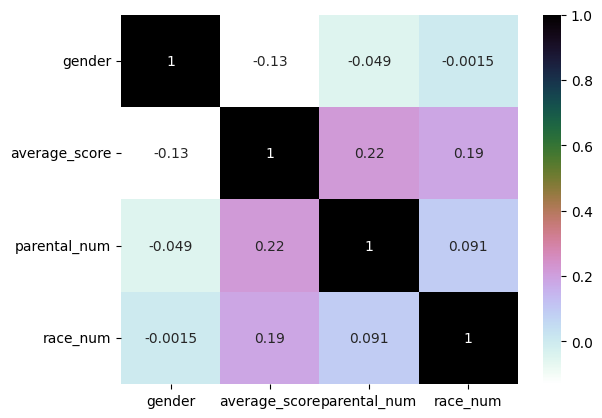

In [27]:
# Heat Map :
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

## ML
Comme on prédit une valeur continue, on utilise la régression linéaire

### Séparation des données

In [28]:
#Separation
X = df.drop(columns='average_score') 
y = df['average_score']
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.2)


#### Vérification des Datasets

In [29]:
X_train.head(3)


,gender,parental_num,race_num
37,0,0.0,3
351,1,1.0,4
82,1,1.0,0


In [30]:
y_train.head(3)

37     57.666667
351    58.333333
82     50.333333
Name: average_score, dtype: float64

In [31]:
X_test.head(3)

,gender,parental_num,race_num
630,1,1.0,3
744,1,1.0,1
71,1,1.0,3


In [32]:
y_test.head(3)

630    67.000000
744    52.333333
71     60.333333
Name: average_score, dtype: float64

### Application de l'algorithme

In [33]:
# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

# Affichage des résultats
results = pd.DataFrame({'Valeur Réelle': y_test, 'Prédiction': prediction})
print(results.head(10))

     Valeur Réelle  Prédiction
630      67.000000   66.947153
744      52.333333   63.264409
71       60.333333   66.947153
407      79.666667   69.128891
678      78.000000   69.354350
602      78.000000   72.245809
511      52.333333   59.015839
406      64.333333   65.671606
208      77.000000   66.721693
172      82.000000   70.404437


In [34]:

# Calculer l'erreur quadratique moyenne (MSE)
mse = metrics.mean_squared_error(y_test, prediction)

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)

# Calculer le coefficient de détermination (R²)
r2 = metrics.r2_score(y_test, prediction)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R² Score:', r2)



Mean Squared Error: 183.75350104727812
Root Mean Squared Error: 13.555570849185147
R² Score: 0.07437484654336712


### Évaluation

Le modèle n'est pas assez performant (;

## Bonus

Changer le problème pour tester d'autres modèles

Nouveau problème : Prédire le niveau parental en fonction d'autres caractéristiques.

In [35]:
# Re-Forming the data frame
X = df.drop(columns='parental_num') 
y = df['parental_num']
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.2)

In [36]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200), 
    "Gaussian Naive Bayes": GaussianNB(),
}

results = []

# Loop through each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    results.append({"Model": model_name, "Accuracy": accuracy})

results_df = pd.DataFrame(results)

# Print the results
print(results_df)

                  Model  Accuracy
0         Decision Tree     0.310
1         Random Forest     0.290
2   K-Nearest Neighbors     0.350
3   Logistic Regression     0.350
4  Gaussian Naive Bayes     0.355


c:\Users\zakaria boukeffa\Desktop\EPSI\ML\Test Blanc\resume-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Interpretation :

Performance assez faible, avec des scores d'accuracy inférieurs à 0.4.

Cela peut indiquer un manque de données ou une faible corrélation entre les caractéristiques choisies.

   gender  average_score  parental_num  race_num  Cluster
0       0      72.666667           3.0         1        0
1       0      82.333333           1.0         2        2
2       0      92.666667           4.0         1        2
Silhouette Score: 0.51


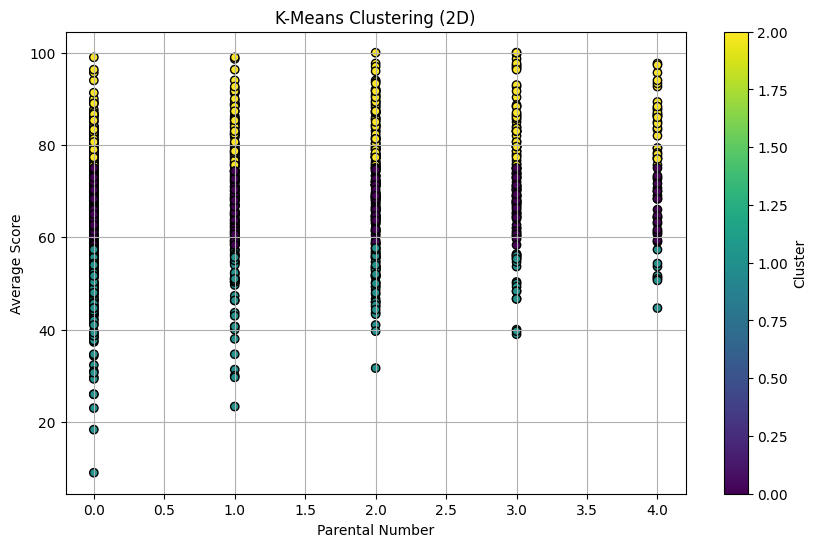

In [49]:
# KNN 
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(df)

# Predict clusters
clusters = kmeans.predict(df)

# Add cluster labels to your DataFrame for analysis
df_with_clusters = pd.DataFrame(df)
df_with_clusters['Cluster'] = clusters

# Print the first few rows with cluster assignments
print(df_with_clusters.head(3))

# Evaluate clustering performance
silhouette_avg = metrics.silhouette_score(X, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Visualize clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(df['parental_num'], df['average_score'], 
            c=clusters, cmap='viridis', marker='o', edgecolor='k')

plt.title('K-Means Clustering (2D)')
plt.xlabel('Parental Number')
plt.ylabel('Average Score')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
